In [294]:
import numpy as np 
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] #petal length and width
y = (iris.target == 0).astype(np.int8) #Iris setosa?

per_clf = Perceptron(random_state=42)
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1], dtype=int8)

In [295]:
#Activation Functions and their derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return 2 * sigmoid(2 * z) - 1

def relu(z):
    return np.maximum(0, z)

def softplus(z):
    return np.log(1 + np.exp(z))

def derivative(f, z, eps = 0.00001):
    return (f(z + eps) - f(z - eps)) / (2*eps)

In [296]:
#Building a Classification MLP using the Sequential API
import tensorflow as tf
from tensorflow import keras
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

fashion_mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [297]:
X_train_full.dtype

dtype('uint8')

In [298]:
X_valid, X_train  = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train  = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [299]:
class_names = ["Tshirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

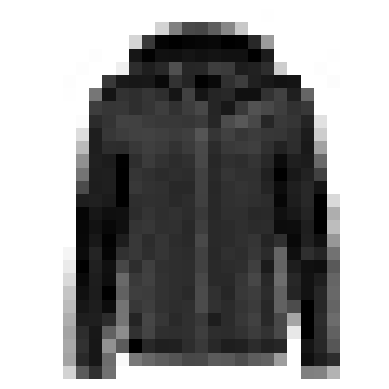

In [300]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [301]:
# model = keras.models.Sequential()  - Creates sequential model (input layers stacked sequentially)
# model.add(keras.layers.InputLayer(shape=[28,28]))  - Input layer converts each image shape to a 1D array
# model.add(keras.layers.Dense(300, activation='relu'))  - First hidden layer w/ 300 neuronsand relu activation function
# model.add(keras.layers.Dense(100, activation='relu'))  - Second hidden layer w/ 100 neurons and relu activatin function
# model.add(keras.layers.Dense(10, activation='softmax'))  - Output layer with 10 neurons (1 per class) using softmax activation function since classes are exclusive

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [302]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [303]:
#keras.utils.plot_model(model)

In [304]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6902 - loss: 0.9853 - val_accuracy: 0.8254 - val_loss: 0.5138
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8277 - loss: 0.4979 - val_accuracy: 0.8448 - val_loss: 0.4511
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8439 - loss: 0.4459 - val_accuracy: 0.8542 - val_loss: 0.4176
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8537 - loss: 0.4163 - val_accuracy: 0.8638 - val_loss: 0.3973
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8603 - loss: 0.3949 - val_accuracy: 0.8656 - val_loss: 0.3829
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8655 - loss: 0.3783 - val_accuracy: 0.8688 - val_loss: 0.3707
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8706 - loss: 0.3643 - val_accuracy: 0.8718 - val_loss: 0.3610
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8751 - loss: 0.3523 - 

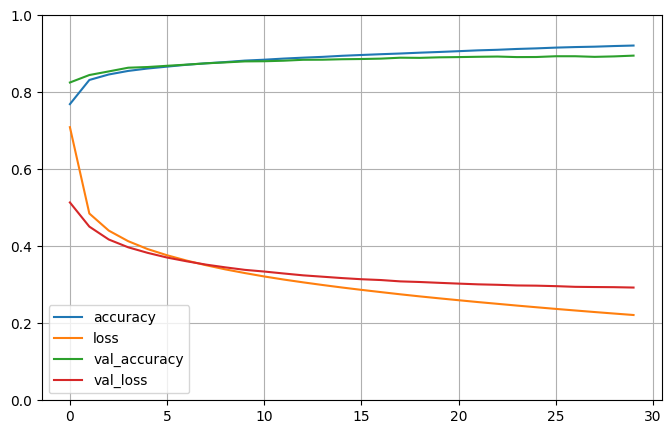

In [305]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [306]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8802 - loss: 0.3318


[0.3291529417037964, 0.8826000094413757]

In [307]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Predicted Clothing Item: Ankle boot


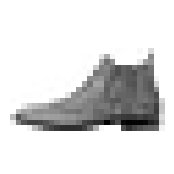

Predicted Clothing Item: Pullover


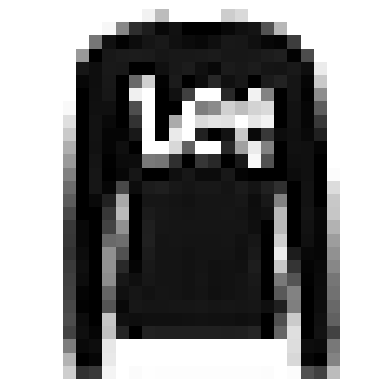

Predicted Clothing Item: Trouser


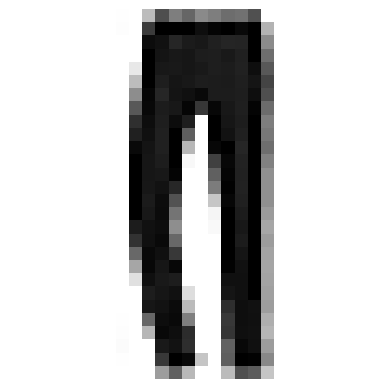

In [310]:
y_new = y_test[:3]

plt.figure(figsize=(5, 2))
for i in range(len(X_new)):
    print(f'Predicted Clothing Item: {class_names[y_test[i]]}')
    plt.imshow(X_new[i], cmap='binary')
    plt.axis('off')
    plt.show()

Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9704 - val_loss: 0.8596
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9133 - val_loss: 0.7342
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8059 - val_loss: 0.6790
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7500 - val_loss: 0.6406
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7070 - val_loss: 0.6085
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6701 - val_loss: 0.5823
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6385 - val_loss: 0.5603
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6112 - val_loss: 0.5424
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.5875 - val_loss: 0.5276
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - loss: 0.5671 - val_loss: 0.5154
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5495 - val_loss: 0.5054
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

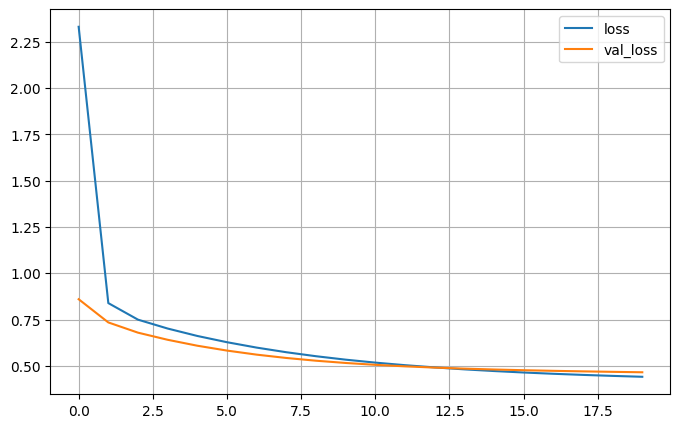

array([[0.37506473],
       [1.7215912 ],
       [3.4720595 ]], dtype=float32)

In [ ]:
#Building a Regression MLP using the Sequential API
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_valid = scaler.fit_transform(X_valid)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca()
plt.show()

y_pred

In [229]:
#Complex Models using the Functional API - Wide and Deep
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_) #Pass the input layer to 1st hidden layer
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) #Pass the output of the 1st hidden layer to the second hidden layer
concat = keras.layers.Concatenate()([input_, hidden2]) #Concat layer to concatanate the input layer and the output of the second hidden layer
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

y_pred

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9865 - val_loss: 0.8330
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 0.7929 - val_loss: 0.6955
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.7089 - val_loss: 0.6452
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.6608 - val_loss: 0.6112
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6230 - val_loss: 0.5848
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5923 - val_loss: 0.5636
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.5670 - val_loss: 0.5464
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.5457 - val_loss: 0.5320
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.5276 - val_loss: 0.5200
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.5122 - val_loss: 0.5097
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4987 - val_loss: 0.5011
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━

array([[0.6334615],
       [1.820287 ],
       [4.054434 ]], dtype=float32)

In [230]:
np.random.seed(42)
tf.random.set_seed(42)

In [231]:
#Subet of features through Wide Path, different subset through Deep Path (possible overlap)
input_A = keras.layers.Input(shape=[5], name = 'wide_input')
input_B = keras.layers.Input(shape=[6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B) #Pass the input layer to 1st hidden layer
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) #Pass the output of the 1st hidden layer to the second hidden layer
concat = keras.layers.Concatenate()([input_A, hidden2]) #Concat layer to concatanate the input layer and the output of the second hidden layer
output = keras.layers.Dense(1, name='output')(concat)
model = keras.Model(inputs=[input_A, input_B], outputs = [output])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))
y_pred

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6947 - val_loss: 0.9976
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9138 - val_loss: 0.7527
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7270 - val_loss: 0.6757
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6598 - val_loss: 0.6326
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6179 - val_loss: 0.6005
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5829 - val_loss: 0.5720
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5517 - val_loss: 0.5480
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5280 - val_loss: 0.5305
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5106 - val_loss: 0.5175
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4974 - val_loss: 0.5077
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4872 - val_loss: 0.5000
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

array([[0.5635959],
       [2.0063496],
       [3.7376406]], dtype=float32)

In [232]:
np.random.seed(42)
tf.random.set_seed(42)

In [233]:
#Subet of features through Wide Path, different subset through Deep Path (possible overlap) w/ Auxilary output
input_A = keras.layers.Input(shape=[5], name = 'wide_input')
input_B = keras.layers.Input(shape=[6], name = 'deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B) #Pass the input layer to 1st hidden layer
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1) #Pass the output of the 1st hidden layer to the second hidden layer
concat = keras.layers.Concatenate()([input_A, hidden2]) #Concat layer to concatanate the input layer and the output of the second hidden layer
output = keras.layers.Dense(1, name='output')(concat)
aux_output = keras.layers.Dense(1, name='aux_ouput')(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs = [output, aux_output])

model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
y_pred_main, y_pred_aux

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_ouput_loss: 0.4423 - loss: 3.2037 - output_loss: 2.7614 - val_aux_ouput_loss: 0.2895 - val_loss: 1.0108 - val_output_loss: 0.7212
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_ouput_loss: 0.2860 - loss: 0.9927 - output_loss: 0.7068 - val_aux_ouput_loss: 0.2097 - val_loss: 0.8300 - val_output_loss: 0.6202
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - aux_ouput_loss: 0.2134 - loss: 0.8382 - output_loss: 0.6248 - val_aux_ouput_loss: 0.1717 - val_loss: 0.7407 - val_output_loss: 0.5689
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_ouput_loss: 0.1768 - loss: 0.7500 - output_loss: 0.5733 - val_aux_ouput_loss: 0.1530 - val_loss: 0.6885 - val_output_loss: 0.5353
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_ouput_loss: 0.1574 - loss: 0.6943 - output_loss: 0.5369 - val_aux_ouput_loss: 0.1430 - val_loss: 0.6557 - val_output_loss: 0.5126
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - aux_ou

(array([[0.30965555],
        [2.054944  ],
        [3.6565967 ]], dtype=float32),
 array([[0.8830205],
        [1.7610571],
        [2.7268775]], dtype=float32))

In [235]:
#Using the Subclassing API to Build Dynamic Models
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

model.compile(loss=["mse","mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.6863 - mse_loss: 0.5647 - val_loss: 1.2679 - val_mse_loss: 0.3643
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2003 - mse_loss: 0.3505 - val_loss: 0.8786 - val_mse_loss: 0.2428
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8997 - mse_loss: 0.2421 - val_loss: 0.7686 - val_mse_loss: 0.1885
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7991 - mse_loss: 0.1923 - val_loss: 0.7149 - val_mse_loss: 0.1652
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7452 - mse_loss: 0.1691 - val_loss: 0.6817 - val_mse_loss: 0.1534
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7088 - mse_loss: 0.1565 - val_loss: 0.6569 - val_mse_loss: 0.1458
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6798 - mse_loss: 0.1480 - val_loss: 0.6370 - val_mse_loss: 0.1399
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6554 - mse_loss: 0.1414 - val_loss: 0.6205

In [238]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [286]:
#Fine Tuning Neural Network Hyperparameters
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8], **kwargs):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

In [276]:
from scikeras.wrappers import KerasRegressor
keras_reg = KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100, 
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5315 - val_loss: 0.9054
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7573 - val_loss: 0.7127
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - loss: 0.6415 - val_loss: 0.5474
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step - loss: 0.5380 - val_loss: 0.5235
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5078 - val_loss: 0.5057
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 883us/step - loss: 0.4871 - val_loss: 0.4925
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 0.4722 - val_loss: 0.4829
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - loss: 0.4611 - val_loss: 0.4749
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4523 - val_loss: 0.4683
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 0.4450 - val_loss: 0.4626
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - loss: 0.4388 - val_loss: 0.4579
Epoch 12/100
363/363 ━━━━━━

KerasRegressor(
	model=<function build_model at 0x149decfe0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [278]:
mse_test = keras_reg.score(X_test, y_test)
print(f'MSE: {mse_test}')

y_pred = keras_reg.predict(X_new)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step
MSE: 0.7148118006064834
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [279]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
keras_reg = KerasRegressor(build_fn=build_model, n_hidden=1, n_neurons=30, learning_rate=3e-3)
print(keras_reg.get_params().keys())

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1,100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist()
}

rand_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rand_search_cv.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [293]:
print(f'Best params: {rand_search_cv.best_params_}')
print(f'Best Score: {rand_search_cv.best_score_}')

model = rand_search_cv.best_estimator_

Best params: {'n_neurons': 67, 'n_hidden': 3, 'learning_rate': 0.01143305454044981}
Best Score: 0.7722979007645283
